<a href="https://colab.research.google.com/github/Sun-ny-A/Hospital-Ratings/blob/main/National_Hospital_Ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Clean Data**

In [235]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [391]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
set_config(display='diagram')
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import folium
from folium.features import GeoJsonTooltip
import geopandas as gpd
!apt install libspatialindex-dev
!pip install rtree
!pip install geopandas
#last three lines installed geopandas, source = https://stackoverflow.com/questions/65324533/geopandas-in-google-colab

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-dev is already the newest version (1.8.5-5).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


source of dataset: https://corgis-edu.github.io/corgis/csv/hospitals/

In [260]:
#upload data
df = pd.read_csv('/content/hospitals.csv')
df.head(10)

,Facility.Name,Facility.City,Facility.State,Facility.Type,Rating.Overall,Rating.Mortality,Rating.Safety,Rating.Readmission,Rating.Experience,Rating.Effectiveness,...,Procedure.Heart Attack.Value,Procedure.Heart Failure.Cost,Procedure.Heart Failure.Quality,Procedure.Heart Failure.Value,Procedure.Pneumonia.Cost,Procedure.Pneumonia.Quality,Procedure.Pneumonia.Value,Procedure.Hip Knee.Cost,Procedure.Hip Knee.Quality,Procedure.Hip Knee.Value
0,Southeast Alabama Medical Center,Dothan,AL,Government,2,Below,Above,Below,Below,Same,...,Average,17041,Average,Average,18281,Average,Average,25812,Average,Higher
1,Marshall Medical Center South,Boaz,AL,Government,1,Below,Below,Below,Same,Above,...,Average,15819,Worse,Average,15614,Worse,Lower,22747,Average,Average
2,Eliza Coffee Memorial Hospital,Florence,AL,Government,3,Below,Above,Above,Below,Same,...,Average,16334,Average,Average,17371,Average,Average,24491,Average,Higher
3,Mizell Memorial Hospital,Opp,AL,Private,1,Same,Same,Below,Below,Below,...,Unknown,14541,Average,Lower,15226,Worse,Lower,23472,Average,Average
4,Crenshaw Community Hospital,Luverne,AL,Proprietary,4,Same,None,Above,None,Same,...,Unknown,13767,Average,Lower,14341,Average,Lower,0,Unknown,Unknown
5,St Vincent's East,Birmingham,AL,Private,2,Same,Below,Below,Below,Below,...,Average,16132,Average,Average,17848,Average,Average,23792,Average,Higher
6,Dekalb Regional Medical Center,Fort Payne,AL,Proprietary,2,Below,Above,Below,Below,Same,...,Average,15761,Average,Average,17896,Worse,Average,0,Unknown,Unknown
7,Shelby Baptist Medical Center,Alabaster,AL,Private,2,Same,Below,Above,Below,Same,...,Average,17937,Average,Higher,18858,Average,Higher,22367,Average,Average
8,Callahan Eye Hospital,Birmingham,AL,Private,-1,None,None,None,None,Same,...,Unknown,0,Unknown,Unknown,0,Unknown,Unknown,0,Unknown,Unknown
9,Helen Keller Memorial Hospital,Sheffield,AL,Government,3,Same,Above,Below,Same,Same,...,Average,17311,Average,Average,17516,Average,Average,23130,Average,Higher


In [261]:
#check for duplicates
df.duplicated().sum()
#drop duplicates from data
df.drop_duplicates(inplace=True)

0

In [262]:
#no missing values
df.info()
#rating, quality, and value columns are ordinal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4772 entries, 0 to 4771
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Facility.Name                    4772 non-null   object
 1   Facility.City                    4772 non-null   object
 2   Facility.State                   4772 non-null   object
 3   Facility.Type                    4772 non-null   object
 4   Rating.Overall                   4772 non-null   int64 
 5   Rating.Mortality                 4772 non-null   object
 6   Rating.Safety                    4772 non-null   object
 7   Rating.Readmission               4772 non-null   object
 8   Rating.Experience                4772 non-null   object
 9   Rating.Effectiveness             4772 non-null   object
 10  Rating.Timeliness                4772 non-null   object
 11  Rating.Imaging                   4772 non-null   object
 12  Procedure.Heart Attack.Cost      4

In [263]:
#rename columns with spaces
df.rename(columns={'Procedure.Heart Attack.Cost':'Procedure.Heart.Attack.Cost'}, inplace=True)
df.rename(columns={'Procedure.Heart Attack.Quality':'Procedure.Heart.Attack.Quality'}, inplace=True)
df.rename(columns={'Procedure.Heart Attack.Value':'Procedure.Heart.Attack.Value'}, inplace=True)
df.rename(columns={'Procedure.Heart Failure.Cost':'Procedure.Heart.Failure.Cost'}, inplace=True)
df.rename(columns={'Procedure.Heart Failure.Quality':'Procedure.Heart.Failure.Quality'}, inplace=True)
df.rename(columns={'Procedure.Heart Failure.Value':'Procedure.Heart.Failure.Value'}, inplace=True)
df.rename(columns={'Procedure.Hip Knee.Cost':'Procedure.Hip.Knee.Cost'}, inplace=True)
df.rename(columns={'Procedure.Hip Knee.Quality':'Procedure.Hip.Knee.Quality'}, inplace=True)
df.rename(columns={'Procedure.Hip Knee.Value':'Procedure.Hip.Knee.Value'}, inplace=True)

In [264]:
df.nunique()
#all ordinal columns for quality and vaue have the four subtypes Above, Same, Below, or None/Unknown.

Facility.Name                      4589
Facility.City                      2929
Facility.State                       56
Facility.Type                         5
Rating.Overall                        6
Rating.Mortality                      4
Rating.Safety                         4
Rating.Readmission                    4
Rating.Experience                     4
Rating.Effectiveness                  4
Rating.Timeliness                     4
Rating.Imaging                        4
Procedure.Heart.Attack.Cost        1845
Procedure.Heart.Attack.Quality        4
Procedure.Heart.Attack.Value          4
Procedure.Heart.Failure.Cost       2469
Procedure.Heart.Failure.Quality       4
Procedure.Heart.Failure.Value         4
Procedure.Pneumonia.Cost           2992
Procedure.Pneumonia.Quality           4
Procedure.Pneumonia.Value             4
Procedure.Hip.Knee.Cost            2335
Procedure.Hip.Knee.Quality            4
Procedure.Hip.Knee.Value              4
dtype: int64

Target is Overall.Rating. Will drop all other rating columns. Will also drop Facility.Name as this is identifying/unique info but will do this later before modeling as I may need it when creating chloropleth map. 

In [265]:
#drop columns
df.drop([ 'Rating.Mortality', 'Rating.Safety', 'Rating.Readmission', 'Rating.Experience', 'Rating.Effectiveness', 'Rating.Timeliness', 'Rating.Imaging'], axis=1, inplace=True)
df.head()

,Facility.Name,Facility.City,Facility.State,Facility.Type,Rating.Overall,Procedure.Heart.Attack.Cost,Procedure.Heart.Attack.Quality,Procedure.Heart.Attack.Value,Procedure.Heart.Failure.Cost,Procedure.Heart.Failure.Quality,Procedure.Heart.Failure.Value,Procedure.Pneumonia.Cost,Procedure.Pneumonia.Quality,Procedure.Pneumonia.Value,Procedure.Hip.Knee.Cost,Procedure.Hip.Knee.Quality,Procedure.Hip.Knee.Value
0,Southeast Alabama Medical Center,Dothan,AL,Government,2,23394,Average,Average,17041,Average,Average,18281,Average,Average,25812,Average,Higher
1,Marshall Medical Center South,Boaz,AL,Government,1,22579,Average,Average,15819,Worse,Average,15614,Worse,Lower,22747,Average,Average
2,Eliza Coffee Memorial Hospital,Florence,AL,Government,3,24002,Average,Average,16334,Average,Average,17371,Average,Average,24491,Average,Higher
3,Mizell Memorial Hospital,Opp,AL,Private,1,0,Unknown,Unknown,14541,Average,Lower,15226,Worse,Lower,23472,Average,Average
4,Crenshaw Community Hospital,Luverne,AL,Proprietary,4,0,Unknown,Unknown,13767,Average,Lower,14341,Average,Lower,0,Unknown,Unknown


In [266]:
df['Facility.State'].value_counts()
#double check VI, GU, AS, MP

TX    403
CA    340
FL    184
IL    180
PA    171
NY    168
OH    168
KS    136
GA    132
MI    131
MN    130
OK    123
WI    123
IN    120
IA    116
LA    116
MO    111
TN    105
NC    105
MS     95
WA     91
KY     91
AL     90
NE     89
VA     84
CO     82
AR     77
AZ     77
NJ     66
MA     62
MT     62
OR     60
SC     60
SD     58
PR     52
WV     49
MD     49
UT     46
ND     44
ID     42
NM     41
NV     35
ME     33
CT     31
WY     28
NH     26
HI     23
AK     22
VT     14
RI     10
DC      8
DE      7
VI      2
GU      2
AS      1
MP      1
Name: Facility.State, dtype: int64

In [267]:
#locate VI
df.loc[df['Facility.State'] == 'VI']
#looks like US territories are included in the state list, VI is Virgin Islands

,Facility.Name,Facility.City,Facility.State,Facility.Type,Rating.Overall,Procedure.Heart.Attack.Cost,Procedure.Heart.Attack.Quality,Procedure.Heart.Attack.Value,Procedure.Heart.Failure.Cost,Procedure.Heart.Failure.Quality,Procedure.Heart.Failure.Value,Procedure.Pneumonia.Cost,Procedure.Pneumonia.Quality,Procedure.Pneumonia.Value,Procedure.Hip.Knee.Cost,Procedure.Hip.Knee.Quality,Procedure.Hip.Knee.Value
4326,"Roy Lester Schneider Hospital,the",St Thomas,VI,Government,3,19583,Average,Lower,11716,Average,Lower,13192,Average,Lower,19770,Average,Lower
4327,Gov Juan F Luis Hospital & Medical Ctr,St Croix,VI,Government,2,20088,Average,Lower,13420,Average,Lower,13038,Average,Lower,17725,Average,Lower


In [268]:
#locate GU
df.loc[df['Facility.State'] == 'GU']
#GU is Guam

,Facility.Name,Facility.City,Facility.State,Facility.Type,Rating.Overall,Procedure.Heart.Attack.Cost,Procedure.Heart.Attack.Quality,Procedure.Heart.Attack.Value,Procedure.Heart.Failure.Cost,Procedure.Heart.Failure.Quality,Procedure.Heart.Failure.Value,Procedure.Pneumonia.Cost,Procedure.Pneumonia.Quality,Procedure.Pneumonia.Value,Procedure.Hip.Knee.Cost,Procedure.Hip.Knee.Quality,Procedure.Hip.Knee.Value
4704,Guam Memorial Hospital Authority,Tamuning,GU,Government,-1,14241,Average,Lower,12685,Average,Lower,12413,Average,Lower,0,Unknown,Unknown
4705,Guam Regional Medical City,Dededo,GU,Private,-1,0,Unknown,Unknown,0,Unknown,Unknown,0,Unknown,Unknown,0,Unknown,Unknown


In [269]:
#locate AS
df.loc[df['Facility.State'] == 'AS']
#AS is American Samoa

,Facility.Name,Facility.City,Facility.State,Facility.Type,Rating.Overall,Procedure.Heart.Attack.Cost,Procedure.Heart.Attack.Quality,Procedure.Heart.Attack.Value,Procedure.Heart.Failure.Cost,Procedure.Heart.Failure.Quality,Procedure.Heart.Failure.Value,Procedure.Pneumonia.Cost,Procedure.Pneumonia.Quality,Procedure.Pneumonia.Value,Procedure.Hip.Knee.Cost,Procedure.Hip.Knee.Quality,Procedure.Hip.Knee.Value
4703,Lbj Tropical Medical Center,Pago Pago,AS,Government,-1,0,Unknown,Unknown,0,Unknown,Unknown,0,Unknown,Unknown,0,Unknown,Unknown


In [270]:
#locate MP
df.loc[df['Facility.State'] == 'MP']
#MP is Northern Mariana Islands

,Facility.Name,Facility.City,Facility.State,Facility.Type,Rating.Overall,Procedure.Heart.Attack.Cost,Procedure.Heart.Attack.Quality,Procedure.Heart.Attack.Value,Procedure.Heart.Failure.Cost,Procedure.Heart.Failure.Quality,Procedure.Heart.Failure.Value,Procedure.Pneumonia.Cost,Procedure.Pneumonia.Quality,Procedure.Pneumonia.Value,Procedure.Hip.Knee.Cost,Procedure.Hip.Knee.Quality,Procedure.Hip.Knee.Value
4706,Commonwealth Health Center,Garapan,MP,Proprietary,-1,15702,Average,Lower,14173,Average,Lower,11087,Worse,Lower,0,Unknown,Unknown


US territories listed plus Puerto Rico and DC adds up to 56 for this column

In [271]:
#Kind of organization operating the hospital: one of Government, Private, Proprietary, Church, or Unknown
df['Facility.Type'].value_counts()

Private        2078
Government     1064
Proprietary     796
Unknown         506
Church          328
Name: Facility.Type, dtype: int64

Change ordinal columns to numeric to make visualizations easier to understand

In [272]:
#Overall rating between 1 and 5 stars, with 5 stars being the highest rating; -1 represents no rating.
df['Rating.Overall'].value_counts()

 3    1258
 4    1087
-1    1057
 2     797
 5     292
 1     281
Name: Rating.Overall, dtype: int64

In [273]:
#create dictionary to fix -1 rating to 0 to represent no rating in Rating.Overall Column
df['Rating.Overall'] = df['Rating.Overall'].replace(['-1'],'0')
df['Rating.Overall'].replace({'-1': 0,}, inplace=True)

In [274]:
df['Rating.Overall'].value_counts()

 3    1258
 4    1087
-1    1057
 2     797
 5     292
 1     281
Name: Rating.Overall, dtype: int64

In [275]:
#Changing type to integer
df = df.astype({"Rating.Overall":'int'})

In [293]:
#Better, Average, Worse, or Unknown
df['Procedure.Heart.Attack.Value'].replace({'Unknown': 0, 'None': 0, 'Worse': 1, 'Lower': 1, 'Average': 2, 'Higher': 3, 'Better': 3}, inplace=True)
df['Procedure.Heart.Attack.Quality'].replace({'Unknown': 0, 'None': 0, 'Worse': 1, 'Average': 2, 'Higher': 3, 'Better': 3}, inplace=True)
df['Procedure.Heart.Failure.Quality'].replace({'Unknown': 0, 'None': 0, 'Worse': 1, 'Average': 2, 'Higher': 3, 'Better': 3}, inplace=True)
df['Procedure.Heart.Failure.Value'].replace({'Unknown': 0, 'None': 0, 'Worse': 1, 'Average': 2, 'Lower': 1, 'Higher': 3, 'Better': 3}, inplace=True)
df['Procedure.Pneumonia.Quality'].replace({'Unknown': 0, 'None': 0, 'Worse': 1, 'Average': 2, 'Higher': 3, 'Better': 3}, inplace=True)
df['Procedure.Pneumonia.Value'].replace({'Unknown': 0, 'None': 0, 'Worse': 1, 'Lower': 1, 'Average': 2, 'Higher': 3, 'Better': 3}, inplace=True)
df['Procedure.Hip.Knee.Quality'].replace({'Unknown': 0, 'None': 0, 'Worse': 1, 'Average': 2, 'Higher': 3, 'Better': 3}, inplace=True)
df['Procedure.Hip.Knee.Value'].replace({'Unknown': 0, 'None': 0, 'Worse': 1, 'Lower': 1, 'Average': 2, 'Higher': 3, 'Better': 3}, inplace=True)

In [278]:
#reviewing to confirm change
df['Procedure.Heart.Attack.Quality'].value_counts()

0    2506
2    2197
3      45
1      24
Name: Procedure.Heart.Attack.Quality, dtype: int64

In [281]:
df['Procedure.Heart.Attack.Value'].value_counts()

0    2506
2    1875
3     199
1     192
Name: Procedure.Heart.Attack.Value, dtype: int64

In [282]:
df['Procedure.Heart.Failure.Quality'].value_counts()

2    3141
0    1300
3     196
1     135
Name: Procedure.Heart.Failure.Quality, dtype: int64

In [285]:
df['Procedure.Heart.Failure.Value'].value_counts()

2    2522
0    1300
3     536
1     414
Name: Procedure.Heart.Failure.Value, dtype: int64

In [286]:
df['Procedure.Pneumonia.Quality'].value_counts()

2    3555
0     759
1     239
3     219
Name: Procedure.Pneumonia.Quality, dtype: int64

In [291]:
df['Procedure.Pneumonia.Value'].value_counts()

2    2338
1     868
3     807
0     759
Name: Procedure.Pneumonia.Value, dtype: int64

In [288]:
df['Procedure.Hip.Knee.Quality'].value_counts()

2    2615
0    2045
3      68
1      44
Name: Procedure.Hip.Knee.Quality, dtype: int64

In [295]:
df['Procedure.Hip.Knee.Value'].value_counts()

0    2045
2    1033
1    1027
3     667
Name: Procedure.Hip.Knee.Value, dtype: int64

**Visualizations**

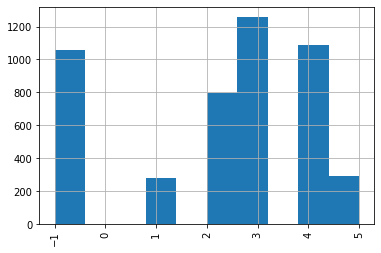

In [294]:
df['Rating.Overall'].hist()
plt.xticks(rotation=90);

The Overal Rating histogram above shows that the greatest number of hospitals have a 3, or average, rating. Over a 1000 hospitals have a 4 rating but almost just as many have no rating.

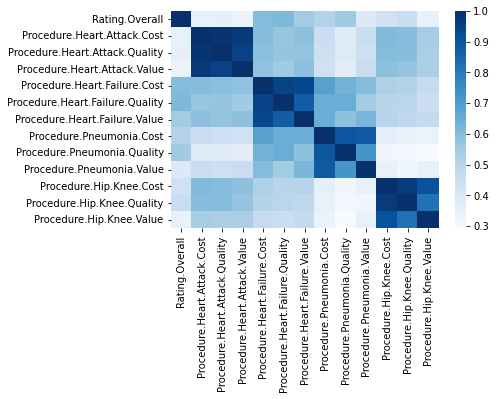

In [296]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues');

In the heat map, I took out annot=True to take out the correlation values as there are too many features and the values overlapped. 

General trends- Procedure.Heart.Failure.Quality and cost has a high correlation with Rating.Morality.

The costs for all 4 procedures tend to be highly correlated with quality and value of that procedure. 

Rating.Readmission has about a 0.7 correlation with Rating.Overall

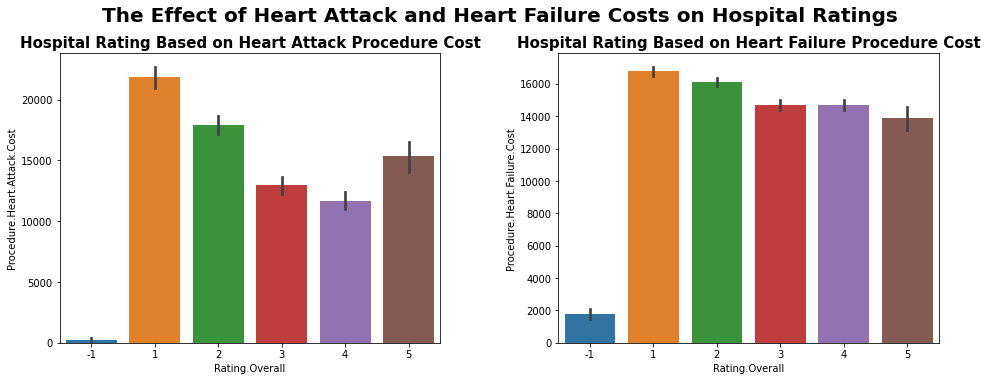

In [297]:
fig, axes = plt.subplots(ncols=2, figsize=(14,5))
sns.barplot(data = df, x = 'Rating.Overall', y = 'Procedure.Heart.Attack.Cost', ax=axes[0])
axes[0].set_title('Hospital Rating Based on Heart Attack Procedure Cost', fontsize = 15, fontweight = 'bold')

sns.barplot(data = df, x = 'Rating.Overall', y = 'Procedure.Heart.Failure.Cost', ax=axes[1])
axes[1].set_title('Hospital Rating Based on Heart Failure Procedure Cost', fontsize = 15, fontweight = 'bold')

fig.suptitle('The Effect of Heart Attack and Heart Failure Costs on Hospital Ratings', fontsize = 20, fontweight = 'bold', y=1.05)
fig.tight_layout()

Heart failure costs are slightly higher than heart attack costs at 4 and 3 rated hospitals. Heart attack costs are higher than heart failure costs at 1 rated hospitals. In general, heart failure and heart attack costs decrease the higher the hospital rating.

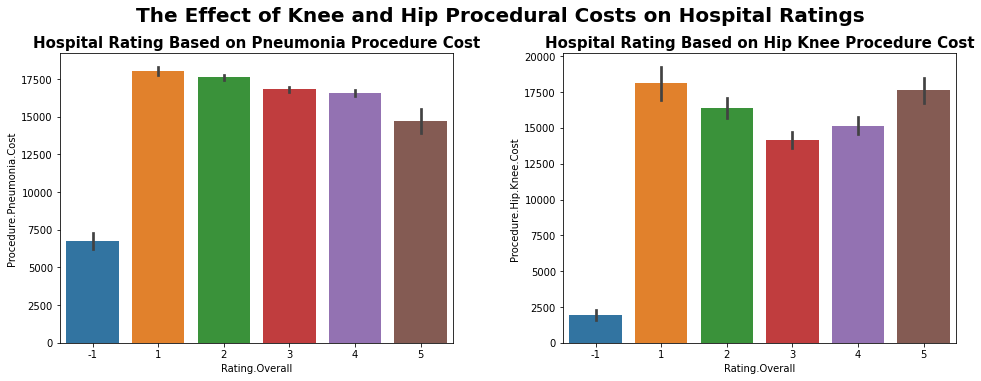

In [298]:
fig, axes = plt.subplots(ncols=2, figsize=(14,5))
sns.barplot(data = df, x = 'Rating.Overall', y = 'Procedure.Pneumonia.Cost', ax=axes[0])
axes[0].set_title('Hospital Rating Based on Pneumonia Procedure Cost', fontsize = 15, fontweight = 'bold')

sns.barplot(data = df, x = 'Rating.Overall', y = 'Procedure.Hip.Knee.Cost', ax=axes[1])
axes[1].set_title('Hospital Rating Based on Hip Knee Procedure Cost', fontsize = 15, fontweight = 'bold')

fig.suptitle('The Effect of Knee and Hip Procedural Costs on Hospital Ratings', fontsize = 20, fontweight = 'bold', y=1.05)
fig.tight_layout()

The trend in the above barplot shows the higher the hospital rating the lower the costs for pneumonia procedures while costs for hip and knee procedures fluctuate more with a average rating of 3 having the least cost.

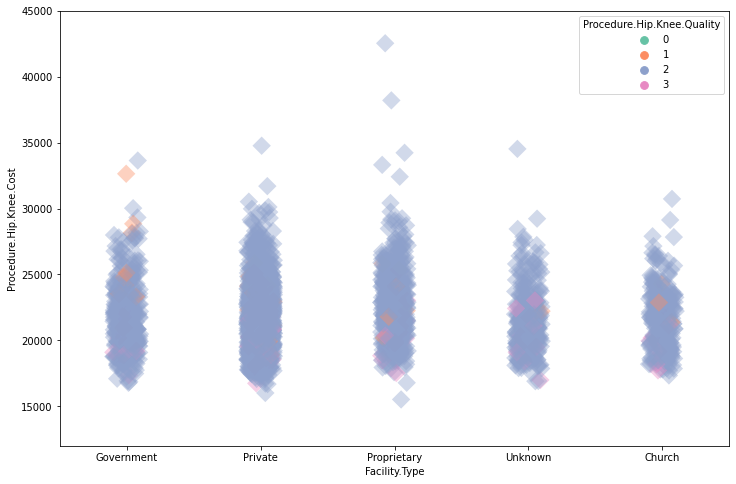

In [299]:
#stripplot
#source: https://www.askpython.com/python-modules/seaborn-stripplot-method
#source: https://stackoverflow.com/questions/40576060/how-to-increase-yaxis-on-seaborn-stripplot
plt.figure(figsize=(12,8))
g= sns.stripplot(x="Facility.Type", y="Procedure.Hip.Knee.Cost", hue="Procedure.Hip.Knee.Quality", data=df, palette="Set2", size=13, marker="D", edgecolor="gray", alpha=.40, jitter=0.10);
g.set_ylim([12000,45000]);

1=below average.
2=average.
3=higher than average.

The above graph is a stripplot of hip and knee procedure costs and the type of facility based on the procedure's quality compared to the national average. Most hospitals no matter the type have a average rating of 2, which is average compared to the national average. There also appears to be a few more 1 rated, or below average rated government hospitals as compared to the others. 

How to create a geospatial map, source = https://towardsdatascience.com/folium-and-choropleth-map-from-zero-to-pro-6127f9e68564

GeoJSON file of US hospitals, source = https://userclub.opendatasoft.com/explore/dataset/us-hospitals/export/ 

In [300]:
#upload data for geospatial map visualization
geojson = gpd.read_file(r'/content/us-hospitals.geojson')

In [301]:
geojson.duplicated().sum()

0

In [302]:
geojson.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6635 entries, 0 to 6634
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   owner       6315 non-null   object  
 1   trauma      6315 non-null   object  
 2   fid         6635 non-null   object  
 3   zip         6622 non-null   object  
 4   population  6315 non-null   float64 
 5   alt_name    6315 non-null   object  
 6   naics_code  6463 non-null   object  
 7   helipad     6315 non-null   object  
 8   zip4        6622 non-null   object  
 9   name        6635 non-null   object  
 10  ttl_staff   6315 non-null   float64 
 11  state_id    6315 non-null   object  
 12  naics_desc  6463 non-null   object  
 13  beds_range  6315 non-null   object  
 14  longitude   6463 non-null   object  
 15  county      6470 non-null   object  
 16  city        6632 non-null   object  
 17  source_dat  6315 non-null   object  
 18  address2    6632 non-null   object  
 19

In [304]:
#only need countyfips and geometry columns for mapping but added city and pop for better visuals
geojson = geojson[['countyfips','geometry', 'name', 'city', 'state']]

In [305]:
#Join the geojson file with covid_df, merged based on hospital name
df_mapping = geojson.merge(df, left_on="name", right_on="Facility.Name", how="outer") 
df_mapping = df_mapping[~df_mapping['name'].isna()]

In [306]:
df_mapping.head()

,countyfips,geometry,name,city,state,Facility.Name,Facility.City,Facility.State,Facility.Type,Rating.Overall,...,Procedure.Heart.Attack.Value,Procedure.Heart.Failure.Cost,Procedure.Heart.Failure.Quality,Procedure.Heart.Failure.Value,Procedure.Pneumonia.Cost,Procedure.Pneumonia.Quality,Procedure.Pneumonia.Value,Procedure.Hip.Knee.Cost,Procedure.Hip.Knee.Quality,Procedure.Hip.Knee.Value
0,42095.0,POINT (-75.36546 40.67312),Coordinated Health Orthopedic Hospital,Bethlehem,PA,Coordinated Health Orthopedic Hospital,Bethlehem,PA,Unknown,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19599.0,2.0,1.0
1,45031.0,POINT (-79.83980 34.31333),Mcleod Medical Center-Darlington,Darlington,SC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,42045.0,POINT (-75.36764 39.85650),Crozer-Chester Medical Center,Upland,PA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,47187.0,POINT (-86.81925 35.91616),Williamson Medical Center,Franklin,TN,Williamson Medical Center,Franklin,TN,Government,5.0,...,2.0,16211.0,2.0,2.0,16148.0,2.0,1.0,21335.0,2.0,1.0
4,49019.0,POINT (-109.56361 38.57874),Moab Regional Hospital,Moab,UT,Moab Regional Hospital,Moab,UT,Private,-1.0,...,0.0,0.0,0.0,0.0,16201.0,2.0,2.0,0.0,0.0,0.0


In [307]:
# Reviewing data for types and missing values
print(df_mapping.isna().sum())

countyfips                          353
geometry                            165
name                                  0
city                                  7
state                                17
Facility.Name                      4065
Facility.City                      4065
Facility.State                     4065
Facility.Type                      4065
Rating.Overall                     4065
Procedure.Heart.Attack.Cost        4065
Procedure.Heart.Attack.Quality     4065
Procedure.Heart.Attack.Value       4065
Procedure.Heart.Failure.Cost       4065
Procedure.Heart.Failure.Quality    4065
Procedure.Heart.Failure.Value      4065
Procedure.Pneumonia.Cost           4065
Procedure.Pneumonia.Quality        4065
Procedure.Pneumonia.Value          4065
Procedure.Hip.Knee.Cost            4065
Procedure.Hip.Knee.Quality         4065
Procedure.Hip.Knee.Value           4065
dtype: int64


In [308]:
#drop missing values in geometry and countyfips columns
#source= https://thispointer.com/pandas-drop-rows-from-a-dataframe-with-missing-values-or-nan-in-columns/
df_mapping= df_mapping.dropna( how='any', subset=['geometry', 'countyfips'])

In [309]:
#confirming no missing values in geometry and countyfips columns
print(df_mapping.isna().sum())

countyfips                            0
geometry                              0
name                                  0
city                                  0
state                                 0
Facility.Name                      3857
Facility.City                      3857
Facility.State                     3857
Facility.Type                      3857
Rating.Overall                     3857
Procedure.Heart.Attack.Cost        3857
Procedure.Heart.Attack.Quality     3857
Procedure.Heart.Attack.Value       3857
Procedure.Heart.Failure.Cost       3857
Procedure.Heart.Failure.Quality    3857
Procedure.Heart.Failure.Value      3857
Procedure.Pneumonia.Cost           3857
Procedure.Pneumonia.Quality        3857
Procedure.Pneumonia.Value          3857
Procedure.Hip.Knee.Cost            3857
Procedure.Hip.Knee.Quality         3857
Procedure.Hip.Knee.Value           3857
dtype: int64


In [310]:
#create base map using folium of just the data from geojson
#40, -96 is center of United States coordinates
us_map = folium.Map(location=[40, -96], zoom_start=4,tiles='openstreetmap')

us_map

In [312]:
#keep getting mapping error, will test chloropleth map on just geojson data
#scale
custom_scale = (geojson['countyfips'].quantile((0,0.2,0.4,0.6,0.8,1))).tolist()

#add to base map by choropleth layering
folium.Choropleth(geo_data=r'.../content/us-hospitals.geojson', data=df_mapping, columns=['geometry','countyfips'],
            key_on='feature.properties.countyfips', #Here we grab the geometries/county boundaries from the geojson file using the key 'coty_code' which is the same as county fip
            threshold_scale=custom_scale,
            fill_color='YlOrRd',
            nan_fill_color="White", #Use white color if there is no data available
            fill_opacity=0.7,
            line_opacity=0.2,
            legend_name='test',
            highlight=True,
            line_color='black').add_to(us_map)

us_map

TypeError: ignored

In [313]:
#test chloropleth map on combined geojson and df data (df_final)

#scale
custom_scale = (df_mapping['Procedure.Heart.Attack.Cost'].quantile((0,0.2,0.4,0.6,0.8,1))).tolist()

#add to base map by choropleth layering
folium.Choropleth(geo_data=r'.../content/us-hospitals.geojson', data=df_mapping, columns=['geometry','Procedure.Heart.Attack.Cost'],
            key_on='feature.properties.countyfips', #Here we grab the geometries/county boundaries from the geojson file using the key 'coty_code' which is the same as county fip
            threshold_scale=custom_scale,
            fill_color='YlOrRd',
            nan_fill_color="White", #Use white color if there is no data available
            fill_opacity=0.7,
            line_opacity=0.2,
            legend_name='Costs of Heart Attack Procedures Based on National Average',
            highlight=True,
            line_color='black').add_to(us_map)
us_map

TypeError: ignored

Still getting same error. Come back to mapping. 

**Modeling**

In [ ]:
#drop Facility.Name from original dataset
df.drop(('Facility.Name'), axis=1, inplace=True)

In [365]:
df1 = df.copy()
df1.duplicated().sum()
#drop duplicates from data
df1.drop_duplicates(inplace=True)

Preprocessing

In [366]:
#assign X and y
#Overall.Rating is the target

X = df1.drop(columns='Rating.Overall')
y = df1['Rating.Overall']

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [367]:
#assign numerical and categorical data
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [368]:
#instantiate the encoder
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')

In [369]:
# instantiate two pipelines for numerical and categorical data
numeric_pipe = make_pipeline(median_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [370]:
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [371]:
# instantiate Column Transformer
# create tuples
num_tuple = (numeric_pipe, num_selector)
cat_tuple = (categorical_pipe, cat_selector)
# rename column transformer to preprocessor
preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb1cbf167d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb1cbf16b50>)])

In [372]:
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb1cbf167d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb1cbf16b50>)])

In [373]:
# only fit to training data
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb1cbf167d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb1cbf16b50>)])

KNN Model

In [374]:
df1['Rating.Overall'].value_counts()

 3    1258
 4    1087
-1    1026
 2     797
 5     292
 1     281
Name: Rating.Overall, dtype: int64

In [375]:
knn= KNeighborsClassifier()

#create a pipeline for KNN model
knn_pipe = make_pipeline(preprocessor, knn)
#fit model to dataset
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb1cbf167d0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb1cbf16b50>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [376]:
#predict Rating.Overall
knn_train_preds = knn_pipe.predict(X_train)
knn_test_preds = knn_pipe.predict(X_test)

In [377]:
#evaluate KNN model

#accuracy
print('Accuracy of Train set', accuracy_score(y_train, knn_train_preds))
print('Accuracy of Test set', accuracy_score(y_test, knn_test_preds))

Accuracy of Train set 0.6047819971870605
Accuracy of Test set 0.4477234401349072


Accuracy of KNN model is 44.8%

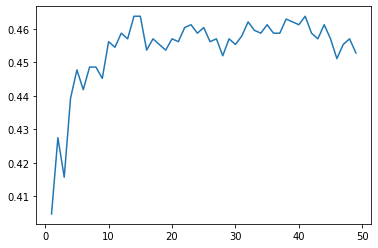

Best K value is 14 
with 0.463743676222597 accuracy on the test set


In [378]:
#find best K value
krange = range(1, 50)
test_accuracies = []
bestacc = 0
bestk = 0
for k in krange:
  #find accuracy for each k
  pipe = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=k))
  pipe.fit(X_train, y_train)
  acc = accuracy_score(y_test, pipe.predict(X_test))
  #if accuracy for this k is better than previous accuracies, set bestk = k
  if acc > bestacc:
    bestacc = acc
    bestk = k

  test_accuracies.append(acc)

#plot accuracies over K
plt.plot(krange, test_accuracies, label='Test K Scores')
plt.show()

#print best k and best accuracy
print(f'Best K value is {bestk} \nwith {bestacc} accuracy on the test set')

Accuracy of KNN model with best k only improved slightly at 46% for the test set.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


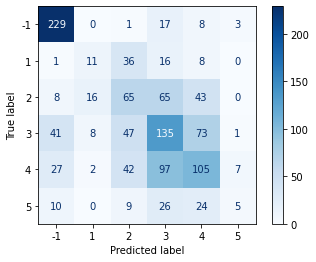

In [341]:
#KNN model, new model with best k and confusion matrix
knn_final_pipe = make_pipeline(preprocessor, 
                               KNeighborsClassifier(n_neighbors = bestk))
knn_final_pipe.fit(X_train, y_train)

#confusion matrix for KNN with best k
plot_confusion_matrix(knn_final_pipe, X_test, y_test, cmap = 'Blues', values_format = 'd');

The confusion matrix shows an overall low correlation ability. It can successfully predict hospitals with no ratings and it has a better than average success of predicting hospitals with an average rating of 3.

PCA with KNN model

In [342]:
knn2 = KNeighborsClassifier()

In [346]:
#create a modeling pipeline for the 1st model with pca
knn2_pca_pipe = make_pipeline(preprocessor, knn2)
knn2_pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb1cc8cfa90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb1cc8cfb90>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [347]:
#evaluate accuracy
print('Training accuracy:', knn2_pca_pipe.score(X_train, y_train))
print('Testing accuracy:', knn2_pca_pipe.score(X_test, y_test))

Training accuracy: 0.6047819971870605
Testing accuracy: 0.4477234401349072


Accuracy with PCA decreased the model's ability to make predictions. The model can only explain 44.8% of the variance.

Logistic Regression Model

In [385]:
logreg = LogisticRegression(C = 1000)

#instanstiate model
logreg_pipe = make_pipeline(preprocessor, logreg)
#train model
logreg_pipe.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb1cbf167d0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb1cbf16b50>)])),
                ('logisticregression', LogisticRegression(C=1000))])

In [386]:
#check test score
print(logreg_pipe.score(X_train, y_train))
print(logreg_pipe.score(X_test, y_test))


0.8784810126582279
0.4418212478920742


{0.0001: 0.2175379426644182,
 0.001: 0.42074198988195616,
 0.01: 0.4308600337268128,
 0.1: 0.45446880269814505,
 1: 0.4645868465430017,
 10: 0.4426644182124789,
 100: 0.40809443507588533,
 1000: 0.3962900505902192}

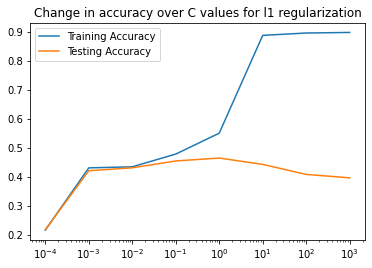

In [389]:
# tuning via L1 regularization

# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
    # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(preprocessor, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}


# highest accuracy at 0.1: 0.4645868465430017

{0.0001: 0.4156829679595278,
 0.001: 0.44097807757166946,
 0.01: 0.4494097807757167,
 0.1: 0.4671163575042159,
 1: 0.45952782462057334,
 10: 0.45109612141652616,
 100: 0.4274873524451939,
 1000: 0.3996627318718381}

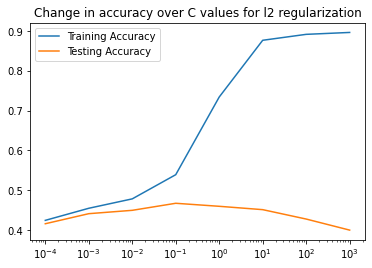

In [390]:
# tuning via L2 regularization

# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipe = make_pipeline(preprocessor, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
  
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}


#highest accuracy is at 0.1: 0.4671163575042159

Logistic Regression with L2 regularization increased the model's accuracy to 46.7% which is the only very slightly higher than the KNN model with k value of 14.

Random Forest Regressor

In [392]:
#instantiate model
rf = RandomForestRegressor(random_state = 42)
#review hyperparameters
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [394]:
#instanstiate model
rf_pipe = make_pipeline(preprocessor, rf)
#train model
rf_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb1cbf167d0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb1cbf16b50>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [396]:
#predict values for y
rf_pipe.predict(X_test)

array([ 3.42,  3.66, -0.96, ...,  2.95,  2.4 ,  3.57])

In [397]:
#evaluate random forest model performance
rf_pipe_train_score = rf_pipe.score(X_train, y_train)
rf_pipe_test_score = rf_pipe.score(X_test, y_test)
print(rf_pipe_train_score)
print(rf_pipe_test_score)

0.9226656977524839
0.49022992339020777


R2 value of 49% for test set. Will tune random forest model to see if model can be improved.

In [398]:
#depth of model with unlimited max_depth
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)

93

In [ ]:
#use loop to loop to find best max_depth
depths = range(1, max(est_depths))
scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   model = RandomForestRegressor(max_depth=depth)
   model_pipe = make_pipeline(preprocessor, model)
   model_pipe.fit(X_train, y_train)
   scores.loc[depth, 'Train Score'] = model_pipe.score(X_train, y_train)
   scores.loc[depth, 'Test Score'] = model_pipe.score(X_test, y_test)
   scores.head()

In [404]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

# best test score at the top

,Test Score,Train Score
10,0.524941,0.681572
8,0.524176,0.627215
9,0.523833,0.656692
12,0.522367,0.724292
7,0.52118,0.602240


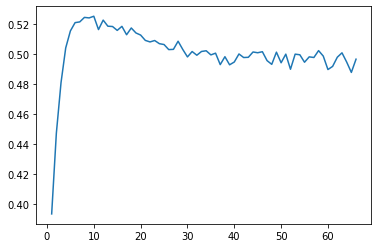

In [405]:
plt.plot(scores['Test Score'])

# confirming best max_depth at 10 via plot

In [411]:
#tune model using n_estimators instead

n_ests = [15, 20, 25, 30, 35]
scores2 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
   model2 = RandomForestRegressor(max_depth=40, n_estimators=n)
   model2_pipe = make_pipeline(preprocessor, model)
   model2_pipe.fit(X_train, y_train)
   scores2.loc[n, 'Train Score'] = model2_pipe.score(X_train, y_train)
   scores2.loc[n, 'Test Score'] = model2_pipe.score(X_test, y_test)
scores2.head()

,Test Score,Train Score
15,0.475764,0.866106
20,0.475758,0.874129
25,0.486941,0.874456
30,0.461011,0.867503
35,0.4607,0.884916


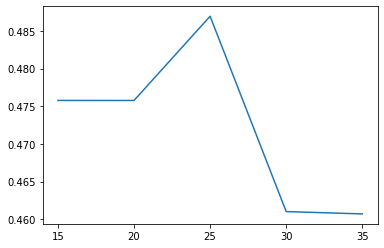

In [412]:
# plot
plt.plot(scores2['Test Score'])
plt.xticks(n_ests);

In [413]:
sorted_scores2 = scores2.sort_values(by='Test Score', ascending=False)
sorted_scores2.head()

# sorted by best score

,Test Score,Train Score
25,0.486941,0.874456
15,0.475764,0.866106
20,0.475758,0.874129
30,0.461011,0.867503
35,0.4607,0.884916


Random Forest model was tuned by using loop to loop find the best max_depth and was also tuned by adjusting n_estimators to change the number of decision trees. Adjusting for n_estimators did not improve the model, it actually decreased to 48.7%. The Random Forest model tuned with loop to loop has the highest test score at 52.5% with a max_depth of 10.